
##*SECTION 1*##
---
# PROJECT
AI 14 강인구

이번 노트는 아래의 구성으로 이뤄져 있습니다.

- **Part 0. Introduction** </br>
  0-1. 기획 배경

- **Part 1. EDA** </br>
  1-1. Name</br>
  1-2. Year</br>
  1-3. Genre</br>
  1-4. Sales</br>
  1-5. Others</br>

- **Part 2. 지역에 따른 선호하는 게임 장르** </br>
  2-1. 데이터 정제 </br>
  2-2. Feature Engineering </br>
  2-3. Log Transformation </br>
  2-4. Data Scaling </br>

- **Part 3. 연도별 게임의 트렌드가 있을까** </br>
  3-1. 가설 </br>
  3-2. Genre </br>
  3-3. Platform</br>

- **Part 4. 최다 판매량 게임 분석**</br>
  4-1. 단일플랫폼 </br>
  4-2. 멀티플랫폼 </br>
  4-3. Wii Sports </br>
  4-4. GTA</br>
  
- **Part 5. 개발 방향**</br>

---

# PART 0. Introduction

###**1. 기획배경**

다음 분기에 어떤 게임을 설계해야 할까

대상자: 비데이터 직군

*  Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
*  Sprint 2 : Hypothesis Test, CI, Bayesian, AB Test
*  Sprint 3 : DR, PCA, Clustering, GD

최근 연도 플롯 불러와서 판매량 확인


가설검정 : 연도별과 게임 장르별 영향이 있다?

최근 유행 트랜드 조사

많이 팔린 게임 조사

->많이 팔린 게임 데이터를 분류해서 게임의 장르를 확인한다.

->장르별 구분해서 판매량 연도 확인 데이터를 종합해서




In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [ ]:
# 파일 불러오기 (local에서 업로드)
from google.colab import files
files.upload()

In [4]:
games = pd.read_csv('vgames2.csv', sep=",")
games.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
#첫번째 unnamed:0은 인덱스와 겹치기에 삭제
games= games.drop(games.columns[[0]],axis=1)
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
print(f'Shape of dataset: {games.shape} \n')

games.info()

Shape of dataset: (16598, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB



1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

# PART1 EDA(데이터 정제)

###**1-1. Name** 



> 게임 이름의 데이터에 문제 있는지 먼저 확인한다.



In [94]:
#결측치(missing value) 확인
games.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64


  > 확인 결과 이름의 값에는 결측치를찾을 수 없다. 그러나 Year,Genre, Publisher에 따른 결측치를 발견했다.

---









###**1-2. Year**



> 먼저 결측값의 크기는 전체 데이터의 양에 비해 적으므로 제거를 진행했다. 



In [16]:
#년도에 대한 문제 
#판매량에 대한 문제: 기본 단위가 백만장인걸로 판단
#1000000
#테트리스 판매량으로 파악했습니다. 
#데이터판매량 K는 1000이므로 
#단위에 맞추어 
#K=1000/1000000
#K는 0.001로 수정합니다. 
#장르는 한번 확인해보고 진행
#판매사 파트는 삭제는 하지 않습니다.
#K: 1e-3

In [17]:
games.dropna(subset=['Year'], inplace=True)
games.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64



> 결측치 제거 후 데이터에 대해 더 자세히 확인해보았습니다.



In [18]:
games.Year.describe()

count    16177.000000
mean      2006.407245
std          5.827320
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64



> 최초의 비디오게임은 1958년에 만들어졌기에 이하의 값은 삭제합니다. 



(array([ 107.,   64.,   89.,  438., 1256., 2413., 3881., 5205., 2381.,
         343.]),
 array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
        2016., 2020.]),
 <a list of 10 Patch objects>)

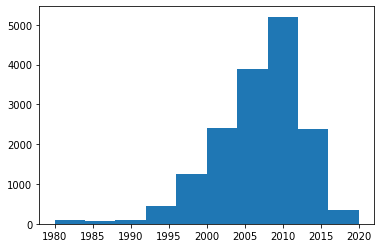

In [19]:

#만약 프로젝트 기간동안 시간이 난다면 50년도 기준으로 
#이하면 +2000 이상이면 +1900하는 구조로 바꾼다. 단점은 데이터의 정확성을 문제이다.
plt.hist(games.Year)

In [20]:

delete_index = games[games.Year<1958].index
games= games.drop(index = delete_index)

In [21]:
games.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

###**1-3. Genre**



> 장르의 결측치는 50으로 전체 데이터 수에 비해 매우 적기에 삭제를 진행했다.



In [22]:
#판매량이 높은 게임 중에서 장르가 없는 경우가 거의 없고
#장르가 없는 것은 추측할 수 없기에 이 또한 삭제한다.
games.dropna(subset=['Genre'], inplace=True)
games.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

###**c. Sales**



> Sales data에 M과 K라는 문자가 들어간 데이터가 발견되었다.</br> 
1989년 테트리스 판매량을 찾아본 결과, 해당 데이터의 기본 단위는 M(1000,000)으로 판단되었다.그래서 K는 0.001, M은 1로 바꾸어 해당데이터에 곱해주었다. 



In [23]:
#df["A"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
#데이터 타입 변경 object에서 float으로
games['NA_Sales']=games['NA_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)
games['JP_Sales']=games['JP_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)
games['Other_Sales']=games['Other_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)
games['EU_Sales']=games['EU_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)

###**d. Others**



> 퍼블리셔가 저희가 어떤 게임을 설계할까? 에 대한 문제에서 벗어나고 1인 개발자 같은 경우에 퍼블리셔가 없을 수 있기에 결측값에 대해 삭제를 진행하지 않습니다. 




#PART2. 지역에 따라서 선호하는 게임 장르가 다를까?

In [24]:
#1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
games_regeion=games.groupby(games.Genre)['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
games_regeion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.99,512.52,155.74,183.64
Adventure,101.46,63.37,51.81,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,399.85,209.73,103.71,72.64
Platform,442.46,199.42,129.22,51.15
Puzzle,121.00,50.40,56.19,12.39
Racing,353.57,234.21,55.42,76.23
Role-Playing,307.08,176.32,336.25,54.71
Shooter,570.89,307.26,37.34,100.82




>시각적으로 지역에 따라 선호하는 게임의 장르가 다른지 알아보기 힘듭니다. </br>
먼저 여러가지 집단에 대해 분석이 가능한 ANOVA 분석을 하여</br>
귀무가설인 지역에 따라 선호하는 게임의 장르가 같다에 대해 확인해보겠습니다. . 





> 



In [25]:
import scipy.stats as stats
import pandas as pd

In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16177 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16177 non-null  object 
 1   Platform     16177 non-null  object 
 2   Year         16177 non-null  float64
 3   Genre        16177 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16177 non-null  float64
 6   EU_Sales     16177 non-null  float64
 7   JP_Sales     16177 non-null  float64
 8   Other_Sales  16177 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [27]:
games_model= games[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
games_model
G1_Action= games_model[games_model.Genre=='Action']
G1_Adventure=games_model[games_model.Genre=='Adventure']
G1_Fighting=games_model[games_model.Genre=='Fighting']
G1_Misc=games_model[games_model.Genre=='Misc']
G1_Platform=games_model[games_model.Genre=='Platform']
G1_Puzzle =games_model[games_model.Genre=='Puzzle']
G1_Racing =games_model[games_model.Genre=='Racing']
G1_RolePlaying =games_model[games_model.Genre=='Role-Playing']
G1_Shooter =games_model[games_model.Genre=='Shooter']
G1_Simulation =games_model[games_model.Genre=='Simulation']
G1_Sports =games_model[games_model.Genre=='Sports']
G1_Strategy =games_model[games_model.Genre=='Strategy']

In [28]:
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
games_modelNA = pd.DataFrame(games, columns=['NA_Sales','Genre'])
modelNA = ols('NA_Sales ~ C(Genre)',games_modelNA).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


####pvalue 확인




In [29]:
print(anova_lm(modelNA))

               df        sum_sq    mean_sq          F        PR(>F)
C(Genre)     11.0    168.362802  15.305709  23.003916  1.602570e-47
Residual  16165.0  10755.420727   0.665352        NaN           NaN


In [30]:
games_modelEU = pd.DataFrame(games, columns=['EU_Sales','Genre'])
modelEU = ols('EU_Sales ~ C(Genre)',games_modelEU).fit()
print(anova_lm(modelEU))

               df       sum_sq   mean_sq          F        PR(>F)
C(Genre)     11.0    41.648048  3.786186  14.812903  4.795308e-29
Residual  16165.0  4131.782824  0.255601        NaN           NaN


In [31]:
games_modelJP = pd.DataFrame(games, columns=['JP_Sales','Genre'])
modelJP = ols('JP_Sales ~ C(Genre)',games_modelJP).fit()
print(anova_lm(modelJP))

               df       sum_sq   mean_sq          F         PR(>F)
C(Genre)     11.0    49.399602  4.490873  49.393714  1.362193e-107
Residual  16165.0  1469.720640  0.090920        NaN            NaN


In [32]:
games_modelOT = pd.DataFrame(games, columns=['Other_Sales','Genre'])
modelOT = ols('Other_Sales ~ C(Genre)',games_modelOT).fit()
print(anova_lm(modelOT))

               df      sum_sq   mean_sq          F        PR(>F)
C(Genre)     11.0    4.980922  0.452811  12.677558  2.734301e-24
Residual  16165.0  577.373900  0.035718        NaN           NaN


a= 0.05 이하이기에 귀무가설을 기각하고 대립 가설인 지역마다 장르에 따라서 판매량의 차이가 있다는 것을 알수 있다.  

###**결론: 지역마다 장르에 따라서 판매량의 차이가 있다!**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

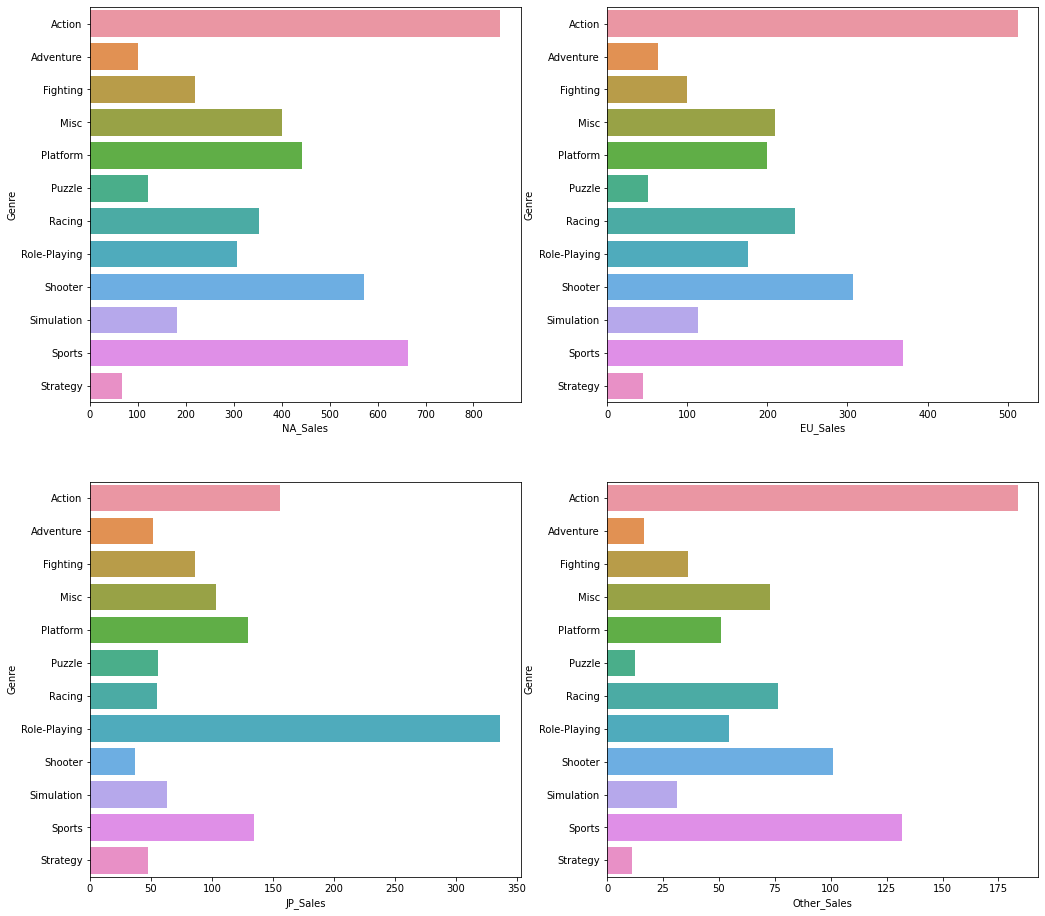

In [33]:
games_regeionNA=games.groupby('Genre', as_index=False )['NA_Sales'].sum()
games_regeionEU=games.groupby('Genre', as_index=False )['EU_Sales'].sum()
games_regeionJP=games.groupby('Genre', as_index=False )['JP_Sales'].sum()
games_regeionOT=games.groupby('Genre', as_index=False )['Other_Sales'].sum()

fig, ax= plt.subplots(ncols=2, nrows=2, figsize=(17,16))
sns.barplot(games_regeionNA['NA_Sales'],games_regeionNA['Genre'], ax= ax[0,0])
sns.barplot(games_regeionEU['EU_Sales'],games_regeionEU['Genre'], ax= ax[0,1])
sns.barplot(games_regeionJP['JP_Sales'],games_regeionJP['Genre'], ax= ax[1,0])
sns.barplot(games_regeionOT['Other_Sales'],games_regeionOT['Genre'], ax= ax[1,1])

<Figure size 7200x7200 with 0 Axes>

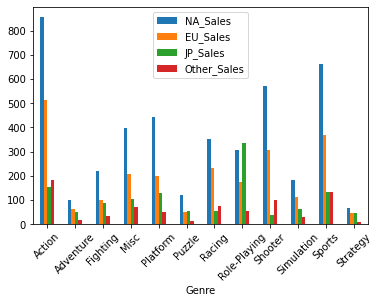

In [26]:
plt.figure(figsize=(100,100))
games_regeion.plot.bar(rot=0)
plt.xticks(rotation=45)
plt.show()

In [27]:
#1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# NA(북아메리카)같은 경우 platform 게임을 제일 선호하고
# EU(유럽)같은 경우 shooter 게임을 제일 선호합니다.
# JP(일본) 같은 경우 role_playing 게임을 제일 선호합니다.
# Other(이외 지역)같은 경우 shooter 게임을 가장 선호합니다.

# PART3.   연도별 게임의 트렌드가 있을까

##3-1. 가설

귀무 가설 : 연도별 게임 트렌드가 없다.</br>
대립 가설 : 연도별 게임 트랜드가 있다.

##3-2. Genre

In [95]:
#2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
game_all= games.copy()

In [96]:
game_all['All_Sales']= game_all['NA_Sales']+game_all['EU_Sales']+game_all['JP_Sales']+game_all['Other_Sales']


In [ ]:
games_year=game_all.groupby(['Year','Genre'],as_index=False)['All_Sales'].sum()
games_year


###1차 시각화

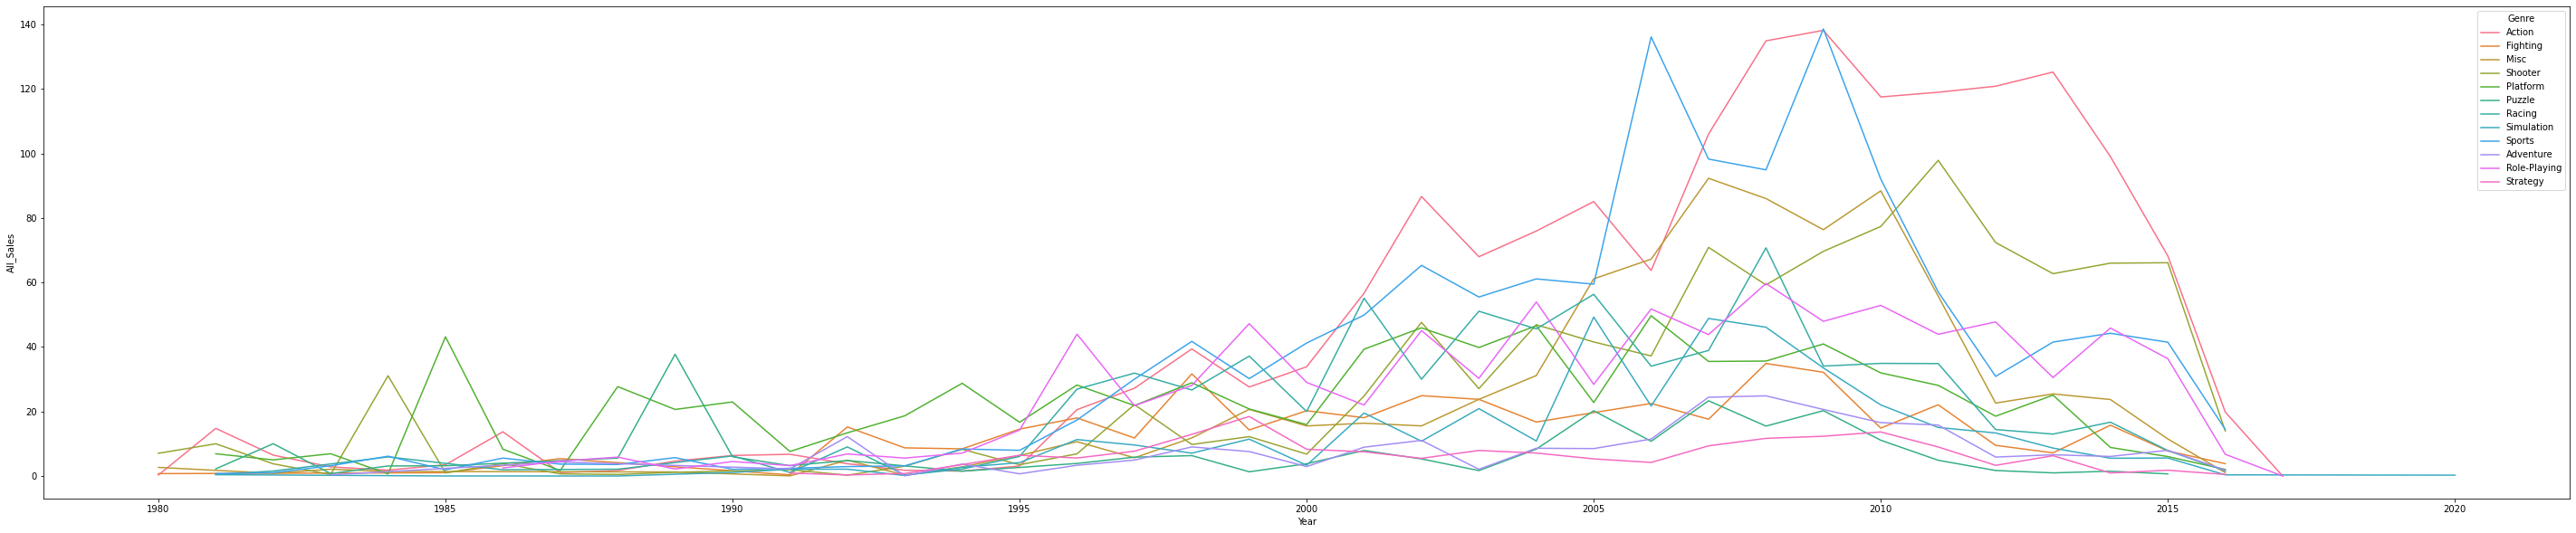

In [98]:
plt.figure(figsize=(50,10))
sns.lineplot(x='Year',y='All_Sales',data=games_year,hue='Genre',)

>자세히 보다보니 2006년도와 2009년의 스포츠 데이터가 높다. 2006년 월드컵과 2008 베이징 올림픽의 영향이 있다고 생각한다.</br> 
그래프가 시각적으로 알아보기 힘들기 때문에 5년 정도로 묶어서 연도별 장르에 대해 확인하겠습니다.

In [99]:
def find_5Year(Years):
  if Years>= 1980.0 and Years < 1985.0:
    return '80-84'
  elif Years>= 1985.0 and Years <1990.0:
    return '85-89'
  elif Years>= 1990.0 and Years <1995.0:
    return '90-94'
  elif Years>= 1995.0 and Years <2000.0:
    return '95-99'
  elif Years>= 2000.0 and Years <2005.0:
    return '00-04'   
  elif Years>= 2005.0 and Years <2010.0:
    return '05-09'    
  elif Years>= 2010.0 and Years <2015.0:
    return '10-14'
  else:
    return '15-20'

games_year['Years']= [find_5Year(e) for e in games_year.Year]

###2차 시각화

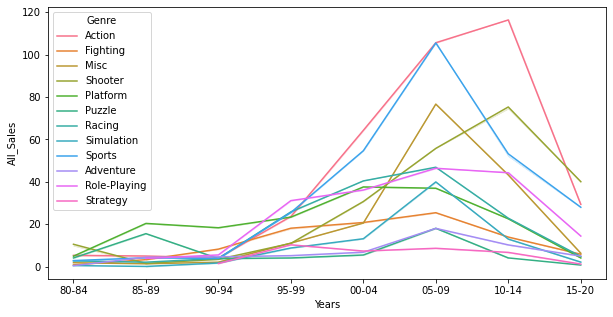

In [100]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Years',y='All_Sales',data=games_year,hue='Genre',ci=False)

아직 너무 많은 장르가 있어서 확인하기 어렵습니다. </br>항상 상위권에 없는 장르들을 삭제하여 다시 그래프를 그렸습니다. 

####연도별 장르 확인

In [ ]:
plt.figure(figsize=(10,5))
#plt.xticks(rotation=45)
sns.barplot(x='Years',y='All_Sales',data=games_year,hue='Genre', ci=False)

In [103]:
pl80y=games_year[games_year.Years == '80-84']
pl80y=pl80y[['Genre', 'All_Sales', 'Years']]
pl80ay=pl80y.groupby(['Years', 'Genre'], as_index=False)['All_Sales'].sum()
pl80ay.sort_values(by=['All_Sales'], ascending=False)

,Years,Genre,All_Sales
7,80-84,Shooter,52.49
0,80-84,Action,26.34
4,80-84,Platform,19.57
5,80-84,Puzzle,16.21
9,80-84,Sports,11.21
6,80-84,Racing,8.00
3,80-84,Misc,7.16
2,80-84,Fighting,0.77
8,80-84,Simulation,0.44
1,80-84,Adventure,0.40


In [104]:
pl85y=games_year[games_year.Years == '85-89']
pl85y=pl85y[['Genre', 'All_Sales', 'Years']]
pl85ay=pl85y.groupby(['Years', 'Genre'], as_index=False)['All_Sales'].sum()
pl85ay.sort_values(by=['All_Sales'], ascending=False)

,Years,Genre,All_Sales
4,85-89,Platform,101.64
5,85-89,Puzzle,46.54
0,85-89,Action,24.76
10,85-89,Sports,20.57
7,85-89,Role-Playing,15.25
8,85-89,Shooter,7.28
2,85-89,Fighting,6.47
1,85-89,Adventure,4.38
6,85-89,Racing,4.10
3,85-89,Misc,1.28


In [105]:
pl90y=games_year[games_year.Years == '90-94']
pl90y=pl90y[['Genre', 'All_Sales', 'Years']]
pl90ay=pl90y.groupby(['Years', 'Genre'], as_index=False)['All_Sales'].sum()
pl90ay.sort_values(by=['All_Sales'], ascending=False)

,Years,Genre,All_Sales
4,90-94,Platform,91.46
2,90-94,Fighting,32.82
7,90-94,Role-Playing,27.36
0,90-94,Action,20.35
10,90-94,Sports,19.06
6,90-94,Racing,18.98
5,90-94,Puzzle,18.77
1,90-94,Adventure,18.29
8,90-94,Shooter,13.65
9,90-94,Simulation,8.33


In [106]:
pl95y=games_year[games_year.Years == '95-99']
pl95y=pl95y[['Genre', 'All_Sales', 'Years']]
pl95ay=pl95y.groupby(['Years', 'Genre'], as_index=False)['All_Sales'].sum()
pl95ay.sort_values(by=['All_Sales'], ascending=False)

,Years,Genre,All_Sales
7,95-99,Role-Playing,155.41
6,95-99,Racing,128.84
10,95-99,Sports,127.38
0,95-99,Action,117.98
4,95-99,Platform,116.51
2,95-99,Fighting,90.39
3,95-99,Misc,55.25
8,95-99,Shooter,54.62
11,95-99,Strategy,51.20
9,95-99,Simulation,43.71


In [107]:
pl00y=games_year[games_year.Years == '00-04']
pl00y=pl00y[['Genre', 'All_Sales', 'Years']]
pl00ay=pl00y.groupby(['Years', 'Genre'], as_index=False)['All_Sales'].sum()
pl00ay.sort_values(by=['All_Sales'], ascending=False)


,Years,Genre,All_Sales
0,00-04,Action,321.14
10,00-04,Sports,273.05
6,00-04,Racing,201.85
4,00-04,Platform,187.68
7,00-04,Role-Playing,180.39
8,00-04,Shooter,153.28
2,00-04,Fighting,103.83
3,00-04,Misc,102.45
9,00-04,Simulation,65.53
11,00-04,Strategy,36.46


In [108]:
pl05y=games_year[games_year.Years == '05-09']
pl05y=pl05y[['Genre', 'All_Sales', 'Years']]
pl05ay=pl05y.groupby(['Years', 'Genre'], as_index=False)['All_Sales'].sum()
pl05ay.sort_values(by=['All_Sales'], ascending=False)

,Years,Genre,All_Sales
0,05-09,Action,527.79
10,05-09,Sports,527.33
3,05-09,Misc,383.01
8,05-09,Shooter,278.59
6,05-09,Racing,234.16
7,05-09,Role-Playing,231.72
9,05-09,Simulation,199.50
4,05-09,Platform,184.64
2,05-09,Fighting,126.91
5,05-09,Puzzle,90.16


In [109]:
pl100y=games_year[games_year.Years == '10-14']
pl100y=pl100y[['Genre', 'All_Sales', 'Years']]
pl100ay=pl100y.groupby(['Years', 'Genre'], as_index=False)['All_Sales'].sum()
pl100ay.sort_values(by=['All_Sales'], ascending=False)

,Years,Genre,All_Sales
0,10-14,Action,581.48
8,10-14,Shooter,376.31
10,10-14,Sports,265.78
7,10-14,Role-Playing,221.06
3,10-14,Misc,216.00
6,10-14,Racing,113.96
4,10-14,Platform,112.62
2,10-14,Fighting,69.50
9,10-14,Simulation,64.73
1,10-14,Adventure,50.99


In [110]:
pl15y=games_year[games_year.Years == '15-20']
pl15y=pl15y[['Genre', 'All_Sales', 'Years']]
pl15ay=pl15y.groupby(['Years', 'Genre'], as_index=False)['All_Sales'].sum()
pl15ay.sort_values(by=['All_Sales'], ascending=False)

,Years,Genre,All_Sales
0,15-20,Action,88.05
8,15-20,Shooter,80.09
10,15-20,Sports,55.95
7,15-20,Role-Playing,43.17
3,15-20,Misc,12.60
2,15-20,Fighting,11.63
1,15-20,Adventure,9.82
6,15-20,Racing,9.54
4,15-20,Platform,8.13
9,15-20,Simulation,6.29


In [111]:
g_condition = (games_year.Genre =='Action')|(games_year.Genre =='Shooter')|(games_year.Genre =='Sports')|(games_year.Genre =='Role-Playing')|(games_year.Genre =='Misc')|(games_year.Genre =='Fighting')|(games_year.Genre =='Racing')|(games_year.Genre =='Platform')|(games_year.Genre =='Puzzle')

###결론: 연도에 따라 장르의 유행이 있다!

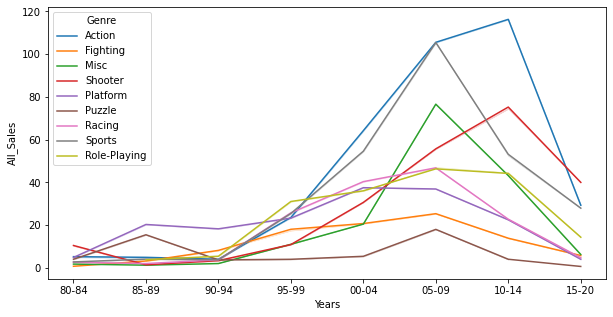

In [112]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Years',y='All_Sales',data=games_year[g_condition],hue='Genre',ci=False)

그래프 확인 결과</br>
**귀무가설인 연도에 따라 트랜드가 같다**
는 **기각**하고</br>
대립가설인 **연도에 따라 트랜드가 달라진다**를 채택합니다.

그래프를 보면 </br>
80-84년도에는 슈팅,85-89년도에는 플랫폼,</br>
90-94년도에도 플랫폼, 95-99년도에는 롤플레잉</br>
00-09년도에는 스포츠와 액션</br>
10-14년도에도 액션</br>
15년도부터는 슈팅 장르가 유행했다.
게임의 트렌드에는 장르뿐만 아니라 플랫폼도 있다. 확인해보자

##3-3. Platform

In [113]:
games_platform=game_all.groupby(['Year','Platform'],as_index=False)['All_Sales'].sum()
games_platform

,Year,Platform,All_Sales
0,1980.0,2600,10.88
1,1981.0,2600,35.68
2,1982.0,2600,28.88
3,1983.0,2600,5.84
4,1983.0,NES,10.96
...,...,...,...
236,2016.0,X360,0.83
237,2016.0,XOne,12.38
238,2017.0,PS4,0.03
239,2017.0,PSV,0.02


###1차 시각화

In [ ]:
plt.figure(figsize=(10,5))
#platform_condition= (games_platform.Platform =='2600')|(games_platform.Platform=='NES')|(games_platform.Platform=='GB')|(games_platform.Platform=='SNES')|(games_platform.Platform=='PS')|(games_platform.Platform=='N64')|(games_platform.Platform=='PS2')|(games_platform.Platform=='GBA')|(games_platform.Platform=='Wii')|(games_platform.Platform=='DS')|(games_platform.Platform=='X360')|(games_platform.Platform=='PS3')|(games_platform.Platform=='PS4')|(games_platform.Platform=='XOne')
sns.lineplot(x='Year',y='All_Sales',data=games_platform,hue= 'Platform',ci=False)

In [115]:
def find_5Year(Years):
  if Years>= 1980.0 and Years < 1985.0:
    return '80-84'
  elif Years>= 1985.0 and Years <1990.0:
    return '85-89'
  elif Years>= 1990.0 and Years <1995.0:
    return '90-94'
  elif Years>= 1995.0 and Years <2000.0:
    return '95-99'
  elif Years>= 2000.0 and Years <2005.0:
    return '00-04'   
  elif Years>= 2005.0 and Years <2010.0:
    return '05-09'    
  elif Years>= 2010.0 and Years <2015.0:
    return '10-14'
  else:
    return '15-20'
games_platform['Years']= [find_5Year(e) for e in games_platform.Year]

####기간별 상위권 플랫폼(5년 기준) 

In [116]:

pl80=games_platform[games_platform.Years=='80-84']
pl80=pl80[['Platform','All_Sales','Years']]
pl80a=pl80.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum()
pl80a.sort_values(by=['All_Sales'], ascending=False)

,Years,Platform,All_Sales
0,80-84,2600,81.55
1,80-84,NES,61.04


In [ ]:
pl85=games_platform[games_platform.Years == '85-89']
pl85=pl85[['Platform', 'All_Sales', 'Years']]
pl85a=pl85.groupby(['Years', 'Platform'], as_index=False)['All_Sales'].sum()
pl85a.sort_values(by=['All_Sales'], ascending=False)

In [ ]:
pl90=games_platform[games_platform.Years == '90-94']
pl90=pl90[['Platform', 'All_Sales', 'Years']]
pl90a=pl90.groupby(['Years', 'Platform'], as_index=False)['All_Sales'].sum()
pl90a.sort_values(by=['All_Sales'], ascending=False)

In [ ]:
pl95=games_platform[games_platform.Years == '95-99']
pl95=pl95[['Platform', 'All_Sales', 'Years']]
pl95a=pl95.groupby(['Years', 'Platform'], as_index=False)['All_Sales'].sum()
pl95a.sort_values(by=['All_Sales'], ascending=False)

In [ ]:
pl00=games_platform[games_platform.Years == '00-04']
pl00=pl00[['Platform', 'All_Sales', 'Years']]
pl00a=pl00.groupby(['Years', 'Platform'], as_index=False)['All_Sales'].sum()
pl00a.sort_values(by=['All_Sales'], ascending=False)

In [ ]:
pl05=games_platform[games_platform.Years == '05-09']
pl05=pl05[['Platform', 'All_Sales', 'Years']]
pl05a=pl05.groupby(['Years', 'Platform'], as_index=False)['All_Sales'].sum()
pl05a.sort_values(by=['All_Sales'], ascending=False)

In [ ]:
pl100=games_platform[games_platform.Years == '10-14']
pl100=pl100[['Platform', 'All_Sales', 'Years']]
pl100a=pl100.groupby(['Years', 'Platform'], as_index=False)['All_Sales'].sum()
pl100a.sort_values(by=['All_Sales'], ascending=False)

In [ ]:
pl15=games_platform[games_platform.Years == '15-20']
pl15=pl15[['Platform', 'All_Sales', 'Years']]
pl15a=pl15.groupby(['Years', 'Platform'], as_index=False)['All_Sales'].sum()
pl15a.sort_values(by=['All_Sales'], ascending=False)

In [ ]:
games_platform[games_platform.Years=='80-84'].sort_values(by=['All_Sales'], ascending=False)

###2차 시각화

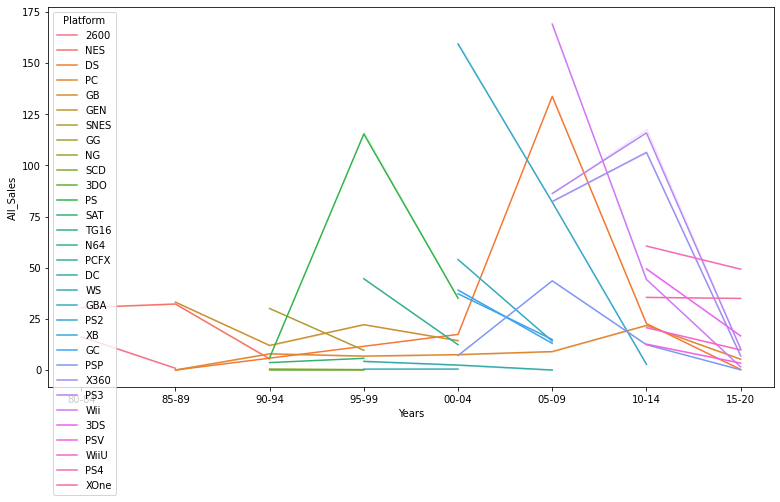

In [125]:
plt.figure(figsize=(13,7))
sns.lineplot(x='Years',y='All_Sales',data=games_platform,hue= 'Platform',ci=False)

In [ ]:
plt.figure(figsize=(14,7))

sns.barplot(x='Years',y='All_Sales',data=games_platform,hue= 'Platform',ci=False)

In [127]:
platform_condition= (games_platform.Platform =='2600')|(games_platform.Platform=='NES')|(games_platform.Platform=='GB')|(games_platform.Platform=='SNES')|(games_platform.Platform=='PS')|(games_platform.Platform=='N64')|(games_platform.Platform=='PS2')|(games_platform.Platform=='GBA')|(games_platform.Platform=='Wii')|(games_platform.Platform=='DS')|(games_platform.Platform=='X360')|(games_platform.Platform=='PS3')|(games_platform.Platform=='PS4')|(games_platform.Platform=='XOne')
#platform_condition= (games_platform.Platform =='2600')|(games_platform.Platform=='NES')|(games_platform.Platform=='GB')|(games_platform.Platform=='SNES')|(games_platform.Platform=='GEN')|(games_platform.Platform=='PS')|(games_platform.Platform=='N64')|(games_platform.Platform=='PC')|(games_platform.Platform=='PS2')|(games_platform.Platform=='GBA')|(games_platform.Platform=='XB')|(games_platform.Platform=='Wii')|(games_platform.Platform=='DS')|(games_platform.Platform=='X360')|(games_platform.Platform=='PS3')|(games_platform.Platform=='3DS')|(games_platform.Platform=='PS4')|(games_platform.Platform=='XOne')

In [128]:
games_platform[platform_condition]

,Year,Platform,All_Sales,Years
0,1980.0,2600,10.88,80-84
1,1981.0,2600,35.68,80-84
2,1982.0,2600,28.88,80-84
3,1983.0,2600,5.84,80-84
4,1983.0,NES,10.96,80-84
...,...,...,...,...
233,2016.0,PS4,35.05,15-20
236,2016.0,X360,0.83,15-20
237,2016.0,XOne,12.38,15-20
238,2017.0,PS4,0.03,15-20


In [129]:
new_platform =games_platform[platform_condition]
games_platform2=new_platform.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum()

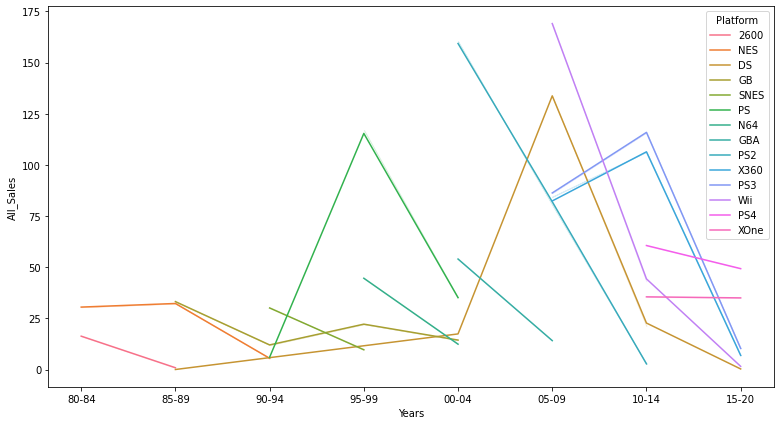

In [130]:
plt.figure(figsize=(13,7))
sns.lineplot(x='Years',y='All_Sales',data=new_platform,hue= 'Platform',ci=False)

###결론: 연도에 따라 장르의 유행이 있다!(3차 시각화)

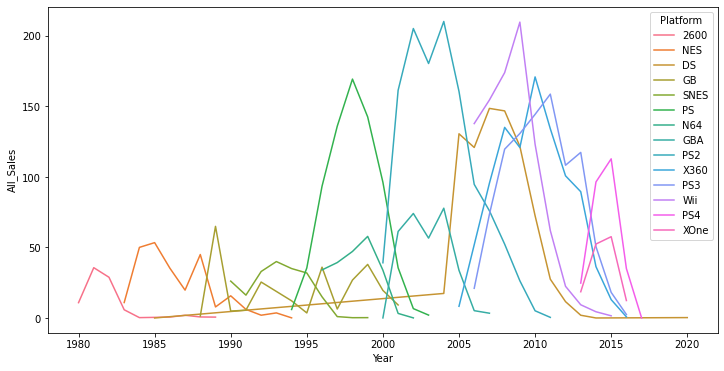

In [132]:
plt.figure(figsize=(12,6))
platform_condition= (games_platform.Platform =='2600')|(games_platform.Platform=='NES')|(games_platform.Platform=='GB')|(games_platform.Platform=='SNES')|(games_platform.Platform=='PS')|(games_platform.Platform=='N64')|(games_platform.Platform=='PS2')|(games_platform.Platform=='GBA')|(games_platform.Platform=='Wii')|(games_platform.Platform=='DS')|(games_platform.Platform=='X360')|(games_platform.Platform=='PS3')|(games_platform.Platform=='PS4')|(games_platform.Platform=='XOne')
sns.lineplot(x='Year',y='All_Sales',data=games_platform[platform_condition],hue= 'Platform',ci=False)

80년대 초반에는 NES와 2600</br>
80년대 후반에는 GB,NES </br>
90년대 초반에는 GB,SNES</br>
90년대 후반에는 PS </br>
00년대 초반에는 PS2</br>
00년대 후반에는 Wii, DS</br>
10년대 초반에는 PS3,XB</br>
10년대 후반에는 PS4, XOne이 유행했다.</br>
2600은 비디오 게임 장르를 열었다고 할 수 있는 아타리가</br> 
NES,GB,SNES,Wii,DS는  닌텐도가,</br>
PS,PS2,PS3,PS4는 소니 컴퓨터 엔터테인먼트가,</br>
XB,XB360,XBOne은 Microsoft가 개발하였다.</br>
그래서 다시 파악하면 80년대 초반에는 아타리 혼자 선두를 달렸으나 1983년부터 아타리쇼크로 인하여 몰락의 길을 걷기 시작했다</br>
80년대 후반부터 90년대 초반은 Nitendo가</br>
90년대부터 2000년대 초반은 소니가</br>
2000년대 후반에는 다시 Nintendo가</br>
2010년대부터는 Microsoft와 Sony의 대결이었다.


#PART4. 어떤 게임이 많이 팔렸을까

In [55]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
game_asc= game_all.sort_values(by=['All_Sales'], ascending=False)
game_asc.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [56]:
# explodes=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]


이 최다 판매량 순위에는 함정이 있습니다.</br> 
멀티 플랫폼을 고려하지 않았기 때문입니다.</br>
그래도 이 데이터에서 알 수 있는 점은 단일 플랫폼으로 하였을 때는 유통하는 회사는 닌텐도가 압도적인 것을 알 수 있습니다. 

추가적으로 왜 90년대 후반에 롤플레잉 장르가 유행했는지 알 수 있습니다. 바로 4위에 해당하는 포켓몬 게임입니다. 무려 90년대 후반의 롤플레잉 전반 판매량과 비슷할 정도입니다. 

플랫폼 상관 없이 많이 팔릔 상위 10개의 게임을 찾아보겠습니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


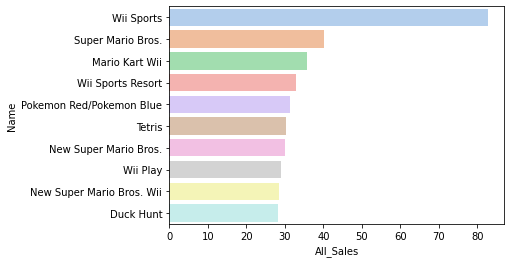

In [57]:
#상위권 데이터는 일단 10%로 스캐터 플롯 구성
game_per= game_asc.head(10) 
game_per1= game_per[['Name','All_Sales']]
game_per_sum= game_per1['All_Sales'].sum()
game_per1['Sales_per']= game_per1['All_Sales']/game_per_sum
game_per1['Sales_per']=game_per1['Sales_per']*100
#game_per1.drop(['All_Sales'],axis=1,inplace=True)

sns.barplot(y='Name', x='All_Sales',data=game_per1,ci=False,alpha=0.9,palette='pastel')

In [58]:
#Name, Genre, Publisher, 각종 sales들
games_all2= game_all.drop('Platform',axis=1)

In [59]:
games_all3= games_all2.groupby(['Year', 'Name','Genre'],as_index=False)['All_Sales'].sum()
games_ascAll=games_all3.sort_values(by=['All_Sales'], ascending=False)
games_ascAll.head(10)

,Year,Name,Genre,All_Sales
5747,2006.0,Wii Sports,Sports,82.74
132,1985.0,Super Mario Bros.,Platform,40.24
10932,2013.0,Grand Theft Auto V,Action,37.77
7161,2008.0,Mario Kart Wii,Racing,35.83
8661,2009.0,Wii Sports Resort,Sports,33.00
842,1996.0,Pokemon Red/Pokemon Blue,Role-Playing,31.38
9673,2011.0,Call of Duty: Modern Warfare 3,Shooter,30.84
200,1989.0,Tetris,Puzzle,30.26
5462,2006.0,New Super Mario Bros.,Platform,30.01
10416,2012.0,Call of Duty: Black Ops II,Shooter,29.73


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


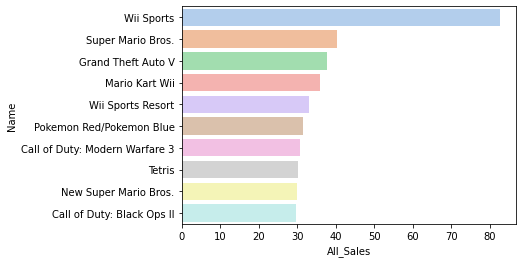

In [60]:
games_per11=games_ascAll.head(10)
games_per_sum1= games_per11['All_Sales'].sum()
games_per11['Sales_per']= games_per11['All_Sales']/games_per_sum1
sns.barplot(y='Name', x='All_Sales',data=games_per11,ci=False,alpha=0.9,palette='pastel')

In [ ]:
game_asc.info()

가장 많이 팔린 게임은 위 스포츠입니다. 2006년에 발매 되어 

In [92]:
wi_cond = (game_all.Name =='Wii Sports')
game_all[wi_cond]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


이제 상위권의 데이터를 확인해보자 

# PART5. 그래서 어떤 게임을 개발해야 할까?

최근 10년 간의 데이터를 먼저 확인해보자

In [34]:
new_game = games.copy()
year_condition = (new_game.Year>=2010)
new_game = new_game[year_condition]
new_game['All_Sales']= new_game['NA_Sales']+new_game['EU_Sales']+new_game['JP_Sales']+new_game['Other_Sales']


###**1. 플랫폼** 

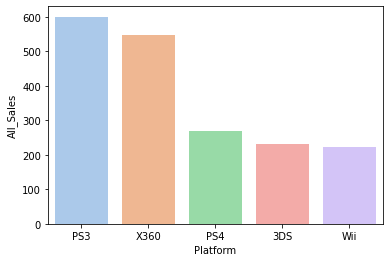

In [35]:
new_game_platform1 = new_game.groupby(by=['Platform'],as_index=False)['All_Sales'].sum()
ngame_pl =new_game_platform1.sort_values(by=['All_Sales'], ascending=False).head(5)
sns.barplot(x='Platform',y='All_Sales',data=ngame_pl,ci=False, palette='pastel')

전체 플랫폼의 판매량을 알아보면 PS3가 제일 많이 팔린 플랫폼이다. 그러나 저희 회사에 필요한 데이터는 최근 10년간의 데이터가 더 중요하다고 생각합니다.

In [36]:
new_game_platform_all= new_game.groupby(by = ['Platform','Year'], as_index=False)['All_Sales'].sum()
new_game_platform_all

,Platform,Year,All_Sales
0,3DS,2011.0,62.33
1,3DS,2012.0,51.10
2,3DS,2013.0,41.32
3,3DS,2014.0,43.12
4,3DS,2015.0,26.82
...,...,...,...
63,X360,2016.0,0.83
64,XOne,2013.0,18.61
65,XOne,2014.0,52.44
66,XOne,2015.0,57.65


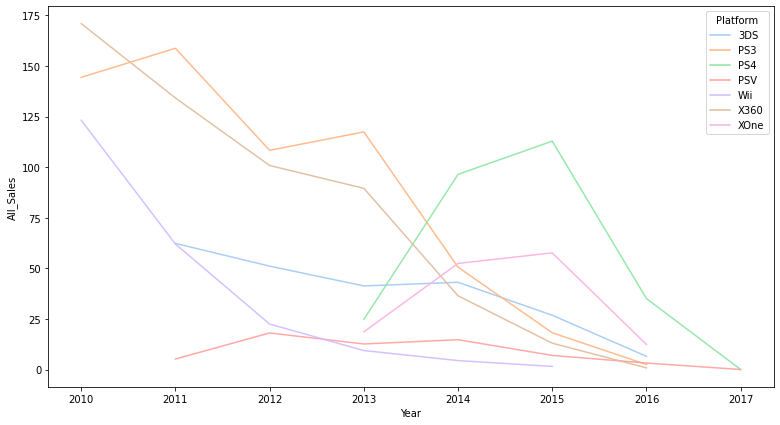

In [93]:
#|(new_game_platform_all.Platform=='PC')
plt.figure(figsize=(13,7))

new_platform_condition= (new_game_platform_all.Platform=='3DS')|(new_game_platform_all.Platform=='PS3')|(new_game_platform_all.Platform=='PS4')|(new_game_platform_all.Platform=='PSV')|(new_game_platform_all.Platform=='Wii')|(new_game_platform_all.Platform=='X360')|(new_game_platform_all.Platform=='XOne')
sns.lineplot(x='Year',y='All_Sales',data=new_game_platform_all[new_platform_condition],hue= 'Platform',ci=False,alpha=0.9,palette='pastel' )

최근 10년간의 판매량의 흐름을 보면 2010년에는 X360이 1위지만</br>
그 이후 2011,2012,2013년은 PS3가 1위이며 
</br>2014년부터는 바톤터치하듯 최신기종인 PS4가 1위를 차지했습니다.
</br>플랫폼은 PS4을 우선적으로 정하여 개발을 하는 것이 좋다고 생각됩니다. 

###**2. 시장**

In [134]:
year_condition2 = (new_game.Year<=2016)
new_games = new_game[year_condition2]

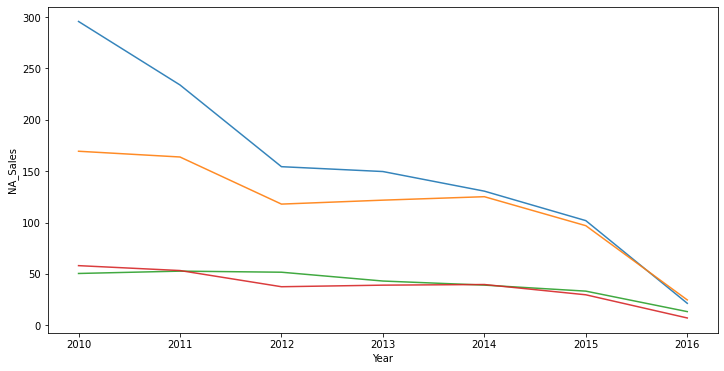

In [136]:
ngames_yearNA=new_games.groupby('Year', as_index=False )['NA_Sales'].sum()
ngames_yearEU=new_games.groupby('Year', as_index=False )['EU_Sales'].sum()
ngames_yearJP=new_games.groupby('Year', as_index=False )['JP_Sales'].sum()
ngames_yearOT=new_games.groupby('Year', as_index=False )['Other_Sales'].sum()
ngames_yearALL=new_games.groupby('Year', as_index=False )['All_Sales'].sum()
#sns.lineplot(x='Year',y='All_Sales',data=ngames_yearALL,ci=False,alpha=0.9,palette='pastel' )
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='NA_Sales',data=ngames_yearNA,ci=False,alpha=0.9,palette='pastel' )
sns.lineplot(x='Year',y='EU_Sales',data=ngames_yearEU,ci=False,alpha=0.9,palette='pastel' )
sns.lineplot(x='Year',y='JP_Sales',data=ngames_yearJP,ci=False,alpha=0.9,palette='pastel' )
sns.lineplot(x='Year',y='Other_Sales',data=ngames_yearOT,ci=False,alpha=0.9,palette='pastel' )


**결론 10년간 주어진 자료에 따르면 전 세계 시장의 판매량이 하락 곡선을 그리고 있습니다. 그래도 유럽, 북미, 일본, 그외 국가 순인 것을 알 수 있습니다.**

###**3. 장르**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

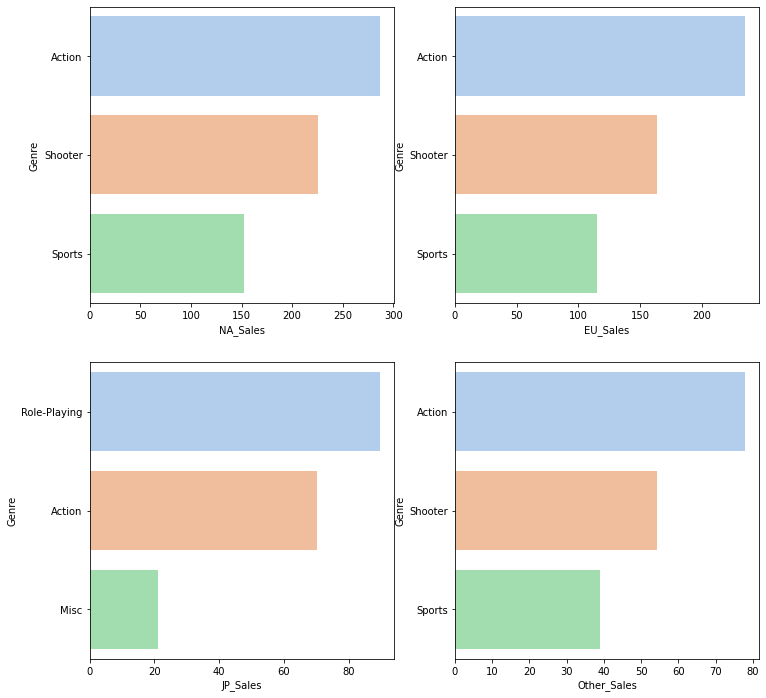

In [41]:
ngames_regeionNA=new_game.groupby('Genre', as_index=False )['NA_Sales'].sum()
ngames_regeionEU=new_game.groupby('Genre', as_index=False )['EU_Sales'].sum()
ngames_regeionJP=new_game.groupby('Genre', as_index=False )['JP_Sales'].sum()
ngames_regeionOT=new_game.groupby('Genre', as_index=False )['Other_Sales'].sum()
ngames_reNA= ngames_regeionNA.sort_values(by=['NA_Sales'], ascending=False).head(3)
ngames_reEU= ngames_regeionEU.sort_values(by=['EU_Sales'], ascending=False).head(3)
ngames_reJP= ngames_regeionJP.sort_values(by=['JP_Sales'], ascending=False).head(3)
ngames_reOT= ngames_regeionOT.sort_values(by=['Other_Sales'], ascending=False).head(3)

fig, ax= plt.subplots(ncols=2, nrows=2, figsize=(12,12))
sns.barplot(ngames_reNA['NA_Sales'],ngames_reNA['Genre'], ax= ax[0,0],alpha=0.9,palette='pastel')
sns.barplot(ngames_reEU['EU_Sales'],ngames_reEU['Genre'], ax= ax[0,1],alpha=0.9,palette='pastel')
sns.barplot(ngames_reJP['JP_Sales'],ngames_reJP['Genre'], ax= ax[1,0],alpha=0.9,palette='pastel')
sns.barplot(ngames_reOT['Other_Sales'],ngames_reOT['Genre'], ax= ax[1,1],alpha=0.9,palette='pastel')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


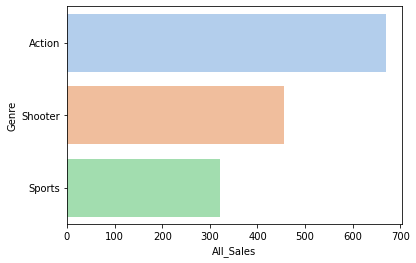

In [42]:
ngames_regeionALL=new_game.groupby('Genre', as_index=False )['All_Sales'].sum()
ngra= ngames_regeionALL.sort_values(by=['All_Sales'], ascending=False).head(3)
sns.barplot(ngra['All_Sales'],ngra['Genre'],alpha=0.9,palette='pastel')

최근 10년 간 가장 많이 팔린 장르는 Action이며, 일본 시장을 제외한 나머지 시장에서 가장 많이 판매된 장르 또한 Action이다.

일본 시장은 Role Playing이 강세인데 이러한 분위기는 파이널판타지, 드래곤퀘스트. 포켓몬스터 등 RPG의 대명사들의 판매량이 높은 것으로 확인됩니다.</br> 
특히 드래곤퀘스트 같은 경우 일본 내 누적 판매량이 8100만장인 것을 고려하면 다른 시장과 달리 롤플레잉이 가장 많이 팔린 것 같습니다.

###**4. 결론**